<a href="https://colab.research.google.com/github/soroushosanlou/DeepLearning/blob/main/Tamrine_RNN_text_classification_rnn_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [13]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"   

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84131840/84125825 [==============================] - 7s 0us/step


In [14]:
os.listdir(dataset_dir)

['train', 'imdb.vocab', 'test', 'imdbEr.txt', 'README']

In [15]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['urls_unsup.txt',
 'urls_pos.txt',
 'urls_neg.txt',
 'unsup',
 'labeledBow.feat',
 'unsupBow.feat',
 'neg',
 'pos']

In [16]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [17]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [18]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 
maxlen = 300

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =max_features) 

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) 
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen) 


17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [19]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen)) 
model.add(Flatten()) 
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 8)            80000     
_________________________________________________________________
flatten (Flatten)            (None, 2400)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2401      
Total params: 82,401
Trainable params: 82,401
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 16s 4ms/step - loss: 0.6543 - acc: 0.6057 - val_loss: 0.3833 - val_acc: 0.8528
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3169 - acc: 0.8814 - val_loss: 0.2986 - val_acc: 0.8794
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2269 - acc: 0.9122 - val_loss: 0.2741 - val_acc: 0.8898
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1914 - acc: 0.9289 - val_loss: 0.2712 - val_acc: 0.8920
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1645 - acc: 0.9398 - val_loss: 0.2735 - val_acc: 0.8914
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1464 - acc: 0.9481 - val_loss: 0.2777 - val_acc: 0.8922
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1260 - acc: 0.9549 - val_loss: 0.2853 - val_acc: 0.8936
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0

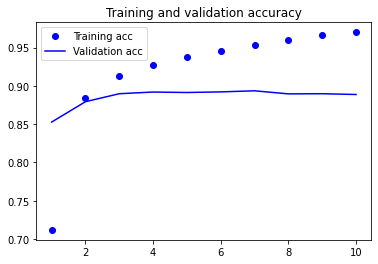

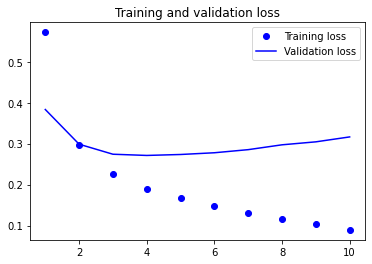

In [21]:
import matplotlib.pyplot as plt

acc = history.history["acc"] 
val_acc = history.history["val_acc"] 
loss = history.history["loss"] 
val_loss = history.history["val_loss"] 

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc") 
plt.plot(epochs, val_acc, "b", label = "Validation acc") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [22]:
train_dir

'./aclImdb/train'

In [23]:
!ls ./aclImdb/train


labeledBow.feat  pos		urls_neg.txt  urls_unsup.txt
neg		 unsupBow.feat	urls_pos.txt


In [27]:
dataset_dir

'./aclImdb'

In [29]:
!ls ./aclImdb


imdbEr.txt  imdb.vocab	README	test  train


In [30]:
import os

imdb_dir = "./aclImdb"
train_dir = os.path.join(imdb_dir, "train")
labels = []
texts = []

for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname [-4:] == ".txt":
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)


In [31]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing. sequence import pad_sequences
import numpy as np

maxlen = 100 
training_samples = 200 
validation_samples = 10000 
max_words = 10000 

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index                 
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) 
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] 
y_train = labels[:training_samples] 
x_val = data[training_samples:training_samples+validation_samples] 
y_val = labels[training_samples:training_samples+validation_samples] 

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [32]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip
!ls
!pwd

--2021-07-08 19:49:50--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-08 19:49:50--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-08 19:49:50--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [37]:
embeddings_index = {}

f = open(os.path.join("/content/glove.6B.100d.txt"), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
f.close()

print("found %s word vectors." % len (embeddings_index))


found 400000 word vectors.


In [38]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim)) 
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word) 
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector 


In [39]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen)) 
model.add(Flatten()) 
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation="sigmoid")) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [41]:
model.compile(optimizer = "rmsprop", 
              loss = "binary_crossentropy", 
              metrics = ["acc"]) 
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))


Epoch 1/10
7/7 [==============================] - 2s 147ms/step - loss: 1.7490 - acc: 0.5265 - val_loss: 0.7687 - val_acc: 0.4972
Epoch 2/10
7/7 [==============================] - 1s 109ms/step - loss: 0.6299 - acc: 0.6897 - val_loss: 1.0966 - val_acc: 0.4973
Epoch 3/10
7/7 [==============================] - 1s 109ms/step - loss: 0.5756 - acc: 0.6769 - val_loss: 0.7649 - val_acc: 0.5073
Epoch 4/10
7/7 [==============================] - 1s 105ms/step - loss: 0.4419 - acc: 0.7832 - val_loss: 0.7507 - val_acc: 0.5227
Epoch 5/10
7/7 [==============================] - 1s 104ms/step - loss: 0.2398 - acc: 0.9726 - val_loss: 0.7101 - val_acc: 0.5666
Epoch 6/10
7/7 [==============================] - 1s 107ms/step - loss: 0.1754 - acc: 0.9555 - val_loss: 0.7196 - val_acc: 0.5698
Epoch 7/10
7/7 [==============================] - 1s 109ms/step - loss: 0.0889 - acc: 1.0000 - val_loss: 0.7145 - val_acc: 0.5783
Epoch 8/10
7/7 [==============================] - 1s 110ms/step - loss: 0.0699 - acc: 0.99

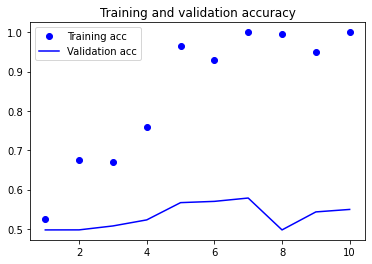

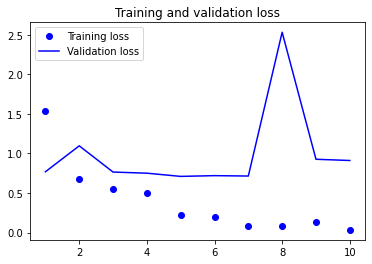

In [42]:

import matplotlib.pyplot as plt

acc = history.history["acc"] 
val_acc = history.history["val_acc"]
loss = history.history["loss"] 
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [43]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 
maxlen = 500 
batch_size = 32

print ("loading data ...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

input_train = input_train[:5000]
y_train = y_train[:5000]
input_test = input_test[:5000]
y_test = y_test[:5000]

print(len(input_train), "train sequences")
print(len(input_test), "test sequences")


print("Pad sequences (samples x time)")
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)


loading data ...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


5000 train sequences
5000 test sequences
Pad sequences (samples x time)
input_train shape: (5000, 500)
input_test shape: (5000,)


/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [44]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["acc"])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
32/32 [==============================] - 10s 48ms/step - loss: 0.6910 - acc: 0.5264 - val_loss: 0.6676 - val_acc: 0.6410
Epoch 2/10
32/32 [==============================] - 1s 28ms/step - loss: 0.6276 - acc: 0.7413 - val_loss: 0.5461 - val_acc: 0.7880
Epoch 3/10
32/32 [==============================] - 1s 28ms/step - loss: 0.4788 - acc: 0.8360 - val_loss: 0.4680 - val_acc: 0.8030
Epoch 4/10
32/32 [==============================] - 1s 28ms/step - loss: 0.3213 - acc: 0.8817 - val_loss: 0.4718 - val_acc: 0.8100
Epoch 5/10
32/32 [==============================] - 1s 28ms/step - loss: 0.2301 - acc: 0.9208 - val_loss: 0.3971 - val_acc: 0.8350
Epoch 6/10
32/32 [==============================] - 1s 27ms/step - loss: 0.1790 - acc: 0.9411 - val_loss: 0.3837 - val_acc: 0.8380
Epoch 7/10
32/32 [==============================] - 1s 28ms/step - loss: 0.1175 - acc: 0.9644 - val_loss: 0.4167 - val_acc: 0.8470
Epoch 8/10
32/32 [==============================] - 1s 28ms/step - loss: 0.0985 - 

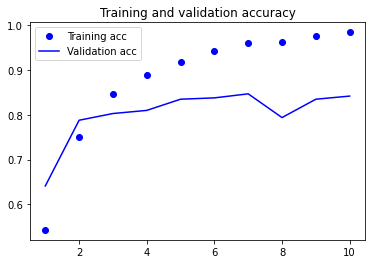

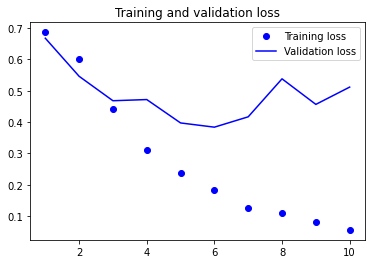

In [45]:
import matplotlib.pyplot as plt

acc = history.history["acc"] 
val_acc = history.history["val_acc"] 
loss = history.history["loss"] 
val_loss = history.history["val_loss"] 

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()